# Think Bayes

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [5]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import pandas as pd

from scipy.stats import poisson

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Joint

import thinkbayes2
import thinkplot

ERROR:root:The 'ast_node_interactivity' trait of a ZMQInteractiveShell instance must be any of ['all', 'last', 'last_expr', 'none'], but a value of 'last_expr_or_assign' <class 'str'> was specified.


Suppose that a radioactive source emits particles toward a Geiger counter at an average rate of r particles per second, but the counter only registers a fraction, f, of the particles that hit it. If f is 10% and the counter registers 15 particles in a one second interval, what is the posterior distribution of n, the actual number of particles that hit the counter, and r, the average rate particles are emitted?

# My Code

In [82]:
from scipy.stats import norm

class Grid(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: f,k
        hypo: r,n
        """
        f,k = data
        r,n = hypo
        
        prob_n = thinkbayes2.EvalBinomialPmf(k, n, f)
        
        prob_r = thinkbayes2.EvalPoissonPmf(n,r)
                                   
        total_like = prob_r * prob_n
    
        return total_like

In [115]:
r = np.linspace(1,400,400)
n = np.linspace(1,400,400)
from itertools import product
hypos = product(r, n)
suite = Grid(hypos)

In [116]:
suite.Update((0.1,15))

6.249963248724576e-05

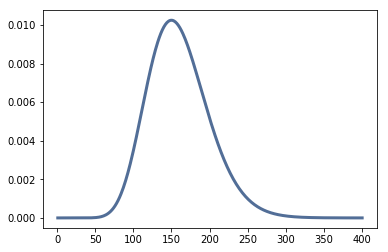

In [117]:
thinkplot.Pdf(suite.Marginal(0))

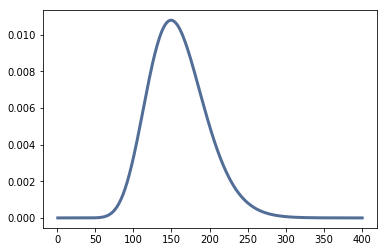

In [118]:
thinkplot.Pdf(suite.Marginal(1))